In [1]:
# Face Detection and Facial Landmark/Contour Addition #

Original Image


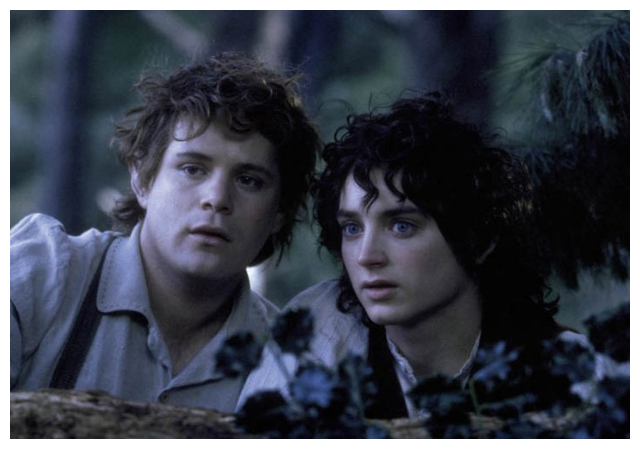

In [2]:
# Plotting the Raw Image

import cv2
import matplotlib.pyplot as plt

image = cv2.imread("./images/frodo_sam.jpg")

print("Original Image")
i = image.shape[1] / image.shape[0]
plt.figure(figsize=(int(6 * i), 6)); plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));

There are 2 Faces in the Loaded Image!


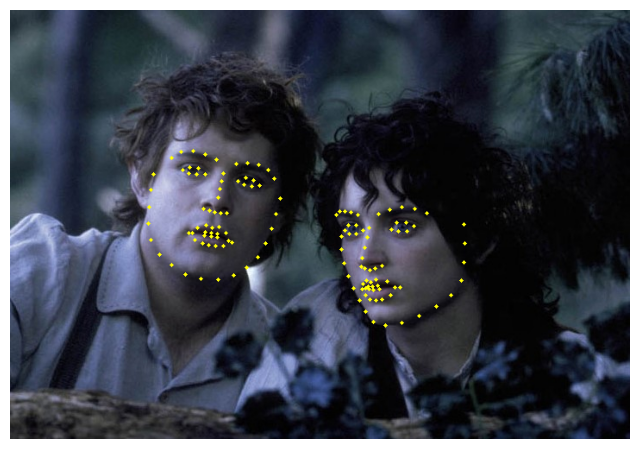

In [3]:
# Adding 68 Landmark Points on the Detected Face Regions

import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("./images/frodo_sam.jpg")

# loading the Shape Predictor:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("./src/shape_predictor_68_face_landmarks.dat")

# Detecting the Face Regions:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 1)

print(f"There are {len(rects)} Faces in the Loaded Image!")

# Getting A Copy of the Image to Add the Landmark Points
image_cp = image.copy()

# Going Through All the Face Bounding Boxes:
for rect in rects:

    # Applying the Shape Predictor to Each Face ROI:
    landmarks = predictor(gray, rect)

    # Detecting 68 Landmarks on the Current Face
    for n in range(0, 68):
        # (x, y) Coordinates of Each 68 Landmark Point for the Current Face 
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        # Adding the Landmark Points for the Current Face on the Image Data
        ## cv2.circle(image, center_coordinates, radius, color, thickness)
        cv2.circle(image_cp, (x, y), 2, (0, 255, 255), -1)

# Plotting the Image with Landmark Points
i = image_cp.shape[1] / image_cp.shape[0]
plt.figure(figsize=(int(6 * i), 6)); plt.axis('off')
plt.imshow(cv2.cvtColor(image_cp, cv2.COLOR_BGR2RGB));

There are 2 Faces in the Loaded Image!


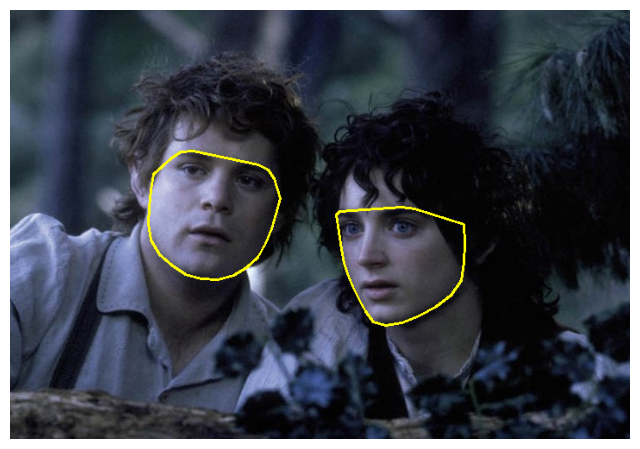

In [4]:
# Drawing Convex Hull Over the 68 Landmark Points That are Detected on Each Face Region

import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("./images/frodo_sam.jpg")

# loading the Face Detector and the Shape Predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("./src/shape_predictor_68_face_landmarks.dat")

# Detecting the Face Regions
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 1)

print(f"There are {len(rects)} Faces in the Loaded Image!")

# Defining a List of Convex Hulls
convexhull = []

# Getting A Copy of the Image to Add Convex Hulls
image_cp = image.copy()

# Going Through All the Face Bounding Boxes
for rect in rects:
    
    # Applying the Shape Predictor to Each Face ROI
    landmarks = predictor(gray, rect)
    landmarks_points = []    # 68 landmark Points for Each Face ROI
    
    # Detecting 68 Landmarks on the Current Face
    for n in range(68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points.append((x, y))
    
    # Drawing A Contour Around the Current Face with cv2.convexHull Module
    points = np.array(landmarks_points, np.int32)
    convexhull.append(cv2.convexHull(points))

# Drawing All the Contours Over the Image Data
cv2.polylines(image_cp, convexhull, True, (0,255,255), 2)

# Plotting the Image with Convex Hulls
i = image_cp.shape[1] / image_cp.shape[0]
plt.figure(figsize=(int(6 * i), 6)); plt.axis('off')
plt.imshow(cv2.cvtColor(image_cp, cv2.COLOR_BGR2RGB));